In [82]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



In [83]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [84]:
# 데이터 입력
df_pre = pd.read_csv('dataset/wine.csv', header=None)
df = df_pre.sample(frac=1) # 이게 뭐지?
df = df[df[12].isin([0])]
dataset = df.values
X = dataset[:,0:11].astype(float)
Y = dataset[:,11]

In [85]:
# 모델 설정
del model
model = Sequential([
    Dense(30, input_shape=(11,), activation='relu'),
    Dense(11, activation='softmax')
]) 
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 30)                360       
_________________________________________________________________
dense_33 (Dense)             (None, 11)                341       
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [86]:
# 모델 컴파일 
# model.compile(loss='sparse_categorical_crossentropy', 
#               optimizer='adam',
#               metrics=['accuracy'])

In [87]:
# One hot encoding
from tensorflow.keras.utils import to_categorical

Y_encoded = to_categorical(Y,11) # 실값이 6밖에 없어서 11을 넣어서 처리해줘야함.

In [88]:
# 모델 컴파일 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [89]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [90]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [91]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [92]:
# 모델 실행 및 저장

history = model.fit(X, Y_encoded, validation_split=0.33, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 33.46977, saving model to ./model/final001-33.4698.hdf5

Epoch 00002: val_loss improved from 33.46977 to 26.33541, saving model to ./model/final002-26.3354.hdf5

Epoch 00003: val_loss improved from 26.33541 to 20.00350, saving model to ./model/final003-20.0035.hdf5

Epoch 00004: val_loss improved from 20.00350 to 14.85928, saving model to ./model/final004-14.8593.hdf5

Epoch 00005: val_loss improved from 14.85928 to 9.73300, saving model to ./model/final005-9.7330.hdf5

Epoch 00006: val_loss improved from 9.73300 to 6.07398, saving model to ./model/final006-6.0740.hdf5

Epoch 00007: val_loss improved from 6.07398 to 4.55010, saving model to ./model/final007-4.5501.hdf5

Epoch 00008: val_loss improved from 4.55010 to 3.99532, saving model to ./model/final008-3.9953.hdf5

Epoch 00009: val_loss improved from 3.99532 to 3.92084, saving model to ./model/final009-3.9208.hdf5

Epoch 00010: val_loss improved from 3.92084 to 3.54310, saving model to .

Epoch 00094: val_loss did not improve from 1.23209

Epoch 00095: val_loss did not improve from 1.23209

Epoch 00096: val_loss improved from 1.23209 to 1.23052, saving model to ./model/final096-1.2305.hdf5

Epoch 00097: val_loss did not improve from 1.23052

Epoch 00098: val_loss did not improve from 1.23052

Epoch 00099: val_loss did not improve from 1.23052

Epoch 00100: val_loss did not improve from 1.23052

Epoch 00101: val_loss improved from 1.23052 to 1.22706, saving model to ./model/final101-1.2271.hdf5

Epoch 00102: val_loss improved from 1.22706 to 1.22574, saving model to ./model/final102-1.2257.hdf5

Epoch 00103: val_loss did not improve from 1.22574

Epoch 00104: val_loss did not improve from 1.22574

Epoch 00105: val_loss did not improve from 1.22574

Epoch 00106: val_loss did not improve from 1.22574

Epoch 00107: val_loss improved from 1.22574 to 1.22152, saving model to ./model/final107-1.2215.hdf5

Epoch 00108: val_loss did not improve from 1.22152

Epoch 00109: val_los


Epoch 00227: val_loss improved from 1.18158 to 1.18137, saving model to ./model/final227-1.1814.hdf5

Epoch 00228: val_loss improved from 1.18137 to 1.18118, saving model to ./model/final228-1.1812.hdf5

Epoch 00229: val_loss did not improve from 1.18118

Epoch 00230: val_loss improved from 1.18118 to 1.18077, saving model to ./model/final230-1.1808.hdf5

Epoch 00231: val_loss did not improve from 1.18077

Epoch 00232: val_loss did not improve from 1.18077

Epoch 00233: val_loss improved from 1.18077 to 1.17970, saving model to ./model/final233-1.1797.hdf5

Epoch 00234: val_loss did not improve from 1.17970

Epoch 00235: val_loss improved from 1.17970 to 1.17642, saving model to ./model/final235-1.1764.hdf5

Epoch 00236: val_loss did not improve from 1.17642

Epoch 00237: val_loss did not improve from 1.17642

Epoch 00238: val_loss improved from 1.17642 to 1.17578, saving model to ./model/final238-1.1758.hdf5

Epoch 00239: val_loss did not improve from 1.17578

Epoch 00240: val_loss d


Epoch 00352: val_loss did not improve from 1.15026

Epoch 00353: val_loss did not improve from 1.15026

Epoch 00354: val_loss did not improve from 1.15026

Epoch 00355: val_loss did not improve from 1.15026

Epoch 00356: val_loss did not improve from 1.15026

Epoch 00357: val_loss improved from 1.15026 to 1.14768, saving model to ./model/final357-1.1477.hdf5

Epoch 00358: val_loss improved from 1.14768 to 1.14755, saving model to ./model/final358-1.1475.hdf5

Epoch 00359: val_loss did not improve from 1.14755

Epoch 00360: val_loss improved from 1.14755 to 1.14706, saving model to ./model/final360-1.1471.hdf5

Epoch 00361: val_loss did not improve from 1.14706

Epoch 00362: val_loss did not improve from 1.14706

Epoch 00363: val_loss did not improve from 1.14706

Epoch 00364: val_loss did not improve from 1.14706

Epoch 00365: val_loss improved from 1.14706 to 1.14700, saving model to ./model/final365-1.1470.hdf5

Epoch 00366: val_loss did not improve from 1.14700

Epoch 00367: val_lo


Epoch 00489: val_loss did not improve from 1.10592

Epoch 00490: val_loss did not improve from 1.10592

Epoch 00491: val_loss improved from 1.10592 to 1.10342, saving model to ./model/final491-1.1034.hdf5

Epoch 00492: val_loss did not improve from 1.10342

Epoch 00493: val_loss did not improve from 1.10342

Epoch 00494: val_loss did not improve from 1.10342

Epoch 00495: val_loss improved from 1.10342 to 1.10185, saving model to ./model/final495-1.1019.hdf5

Epoch 00496: val_loss did not improve from 1.10185

Epoch 00497: val_loss did not improve from 1.10185

Epoch 00498: val_loss did not improve from 1.10185

Epoch 00499: val_loss did not improve from 1.10185

Epoch 00500: val_loss improved from 1.10185 to 1.10046, saving model to ./model/final500-1.1005.hdf5

Epoch 00501: val_loss did not improve from 1.10046

Epoch 00502: val_loss did not improve from 1.10046

Epoch 00503: val_loss improved from 1.10046 to 1.09900, saving model to ./model/final503-1.0990.hdf5

Epoch 00504: val_lo


Epoch 00630: val_loss did not improve from 1.08438

Epoch 00631: val_loss did not improve from 1.08438

Epoch 00632: val_loss did not improve from 1.08438

Epoch 00633: val_loss did not improve from 1.08438

Epoch 00634: val_loss improved from 1.08438 to 1.08408, saving model to ./model/final634-1.0841.hdf5

Epoch 00635: val_loss did not improve from 1.08408

Epoch 00636: val_loss did not improve from 1.08408

Epoch 00637: val_loss did not improve from 1.08408

Epoch 00638: val_loss did not improve from 1.08408

Epoch 00639: val_loss did not improve from 1.08408

Epoch 00640: val_loss did not improve from 1.08408

Epoch 00641: val_loss did not improve from 1.08408

Epoch 00642: val_loss did not improve from 1.08408

Epoch 00643: val_loss did not improve from 1.08408

Epoch 00644: val_loss did not improve from 1.08408

Epoch 00645: val_loss did not improve from 1.08408

Epoch 00646: val_loss did not improve from 1.08408

Epoch 00647: val_loss did not improve from 1.08408

Epoch 00648: 


Epoch 00777: val_loss did not improve from 1.07523

Epoch 00778: val_loss did not improve from 1.07523

Epoch 00779: val_loss improved from 1.07523 to 1.07430, saving model to ./model/final779-1.0743.hdf5

Epoch 00780: val_loss did not improve from 1.07430

Epoch 00781: val_loss did not improve from 1.07430

Epoch 00782: val_loss did not improve from 1.07430

Epoch 00783: val_loss did not improve from 1.07430

Epoch 00784: val_loss did not improve from 1.07430

Epoch 00785: val_loss did not improve from 1.07430

Epoch 00786: val_loss did not improve from 1.07430

Epoch 00787: val_loss did not improve from 1.07430

Epoch 00788: val_loss did not improve from 1.07430

Epoch 00789: val_loss did not improve from 1.07430

Epoch 00790: val_loss did not improve from 1.07430

Epoch 00791: val_loss did not improve from 1.07430

Epoch 00792: val_loss did not improve from 1.07430

Epoch 00793: val_loss did not improve from 1.07430

Epoch 00794: val_loss did not improve from 1.07430

Epoch 00795: 


Epoch 00932: val_loss did not improve from 1.06970

Epoch 00933: val_loss did not improve from 1.06970

Epoch 00934: val_loss did not improve from 1.06970

Epoch 00935: val_loss did not improve from 1.06970

Epoch 00936: val_loss did not improve from 1.06970

Epoch 00937: val_loss did not improve from 1.06970

Epoch 00938: val_loss did not improve from 1.06970

Epoch 00939: val_loss did not improve from 1.06970

Epoch 00940: val_loss did not improve from 1.06970

Epoch 00941: val_loss did not improve from 1.06970

Epoch 00942: val_loss did not improve from 1.06970

Epoch 00943: val_loss improved from 1.06970 to 1.06851, saving model to ./model/final943-1.0685.hdf5

Epoch 00944: val_loss did not improve from 1.06851

Epoch 00945: val_loss did not improve from 1.06851

Epoch 00946: val_loss did not improve from 1.06851

Epoch 00947: val_loss did not improve from 1.06851

Epoch 00948: val_loss did not improve from 1.06851

Epoch 00949: val_loss did not improve from 1.06851

Epoch 00950: 


Epoch 01089: val_loss improved from 1.06622 to 1.06488, saving model to ./model/final1089-1.0649.hdf5

Epoch 01090: val_loss did not improve from 1.06488

Epoch 01091: val_loss did not improve from 1.06488

Epoch 01092: val_loss did not improve from 1.06488

Epoch 01093: val_loss did not improve from 1.06488

Epoch 01094: val_loss did not improve from 1.06488

Epoch 01095: val_loss did not improve from 1.06488

Epoch 01096: val_loss did not improve from 1.06488

Epoch 01097: val_loss did not improve from 1.06488

Epoch 01098: val_loss did not improve from 1.06488

Epoch 01099: val_loss did not improve from 1.06488

Epoch 01100: val_loss did not improve from 1.06488

Epoch 01101: val_loss did not improve from 1.06488

Epoch 01102: val_loss did not improve from 1.06488

Epoch 01103: val_loss did not improve from 1.06488

Epoch 01104: val_loss did not improve from 1.06488

Epoch 01105: val_loss did not improve from 1.06488

Epoch 01106: val_loss did not improve from 1.06488

Epoch 01107:


Epoch 01255: val_loss did not improve from 1.06430

Epoch 01256: val_loss did not improve from 1.06430

Epoch 01257: val_loss did not improve from 1.06430

Epoch 01258: val_loss did not improve from 1.06430

Epoch 01259: val_loss did not improve from 1.06430

Epoch 01260: val_loss did not improve from 1.06430

Epoch 01261: val_loss did not improve from 1.06430

Epoch 01262: val_loss did not improve from 1.06430

Epoch 01263: val_loss did not improve from 1.06430

Epoch 01264: val_loss did not improve from 1.06430

Epoch 01265: val_loss did not improve from 1.06430

Epoch 01266: val_loss did not improve from 1.06430

Epoch 01267: val_loss did not improve from 1.06430

Epoch 01268: val_loss did not improve from 1.06430

Epoch 01269: val_loss did not improve from 1.06430

Epoch 01270: val_loss did not improve from 1.06430

Epoch 01271: val_loss did not improve from 1.06430

Epoch 01272: val_loss did not improve from 1.06430

Epoch 01273: val_loss did not improve from 1.06430

Epoch 01274

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [94]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

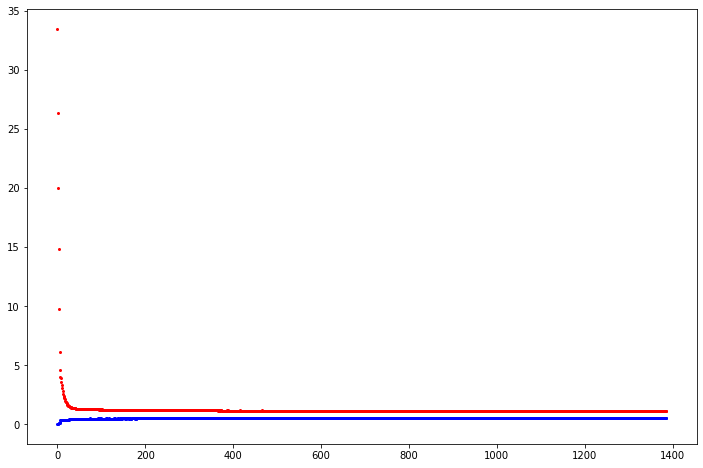

In [95]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()

In [96]:
# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded, verbose=2)[1]))

4898/1 - 0s - loss: 1.4973 - accuracy: 0.5329

 Accuracy: 0.5329
